## Data Cleaning ##

In [46]:
!pip install kagglehub
!pip install wordcloud
!pip install textblob


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\abdul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\abdul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\abdul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [47]:
import pandas as pd
import os
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
import pandas as pd


import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from nltk.util import ngrams
from collections import Counter
from textblob import TextBlob


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
path = kagglehub.dataset_download("saurograndi/airplane-crashes-since-1908")
files = os.listdir(path)
csv_file = [f for f in files if f.endswith(".csv")][0]
csv_path = os.path.join(path, csv_file)
df = pd.read_csv(csv_path)
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [49]:
df.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [50]:
print("Null Values per column")
df.isnull().sum()

Null Values per column


Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

Top 3 columns with the highest number of null values
Flight number has the highest number of null values 4199, followed by time (2219) and route (1707).

## Dealing with missing data and irrelevant columns ##

In [51]:
df.drop("Flight #", axis=1, inplace=True)
df.drop("cn/In", axis=1, inplace=True)
df['Summary'].fillna("No summary provided", inplace=True)
df['Time'].fillna("--", inplace=True)
print("Number of rows before dropping duplicates: ", df.shape[0])

Number of rows before dropping duplicates:  5268


C:\Users\abdul\AppData\Local\Temp\ipykernel_18848\128667358.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Summary'].fillna("No summary provided", inplace=True)
C:\Users\abdul\AppData\Local\Temp\ipykernel_18848\128667358.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [52]:
df=df.dropna(axis=0)
print("Number of rows after removing NULL entries: ", df.shape[0])

Number of rows after removing NULL entries:  3417


In [53]:
df = df.drop_duplicates()
print("Number of rows after removing duplicates: ", df.shape[0])

Number of rows after removing duplicates:  3417


In [54]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,Aboard,Fatalities,Ground,Summary
56,09/06/1921,--,"Paris, France",Franco-Roumaine,Varsovie - Strasbourg - Paris,Potez IX,F-ADCD,5.0,5.0,0.0,Crashed while making an approach to Le Bourget...
80,12/23/1923,02:30,Over the Mediterranean Sea,Military - French Navy,Toulon - Algiers,Zeppelin Dixmunde (airship),L-72,52.0,52.0,0.0,"Crashed while on a flight from Toulon, France ..."
83,04/24/1924,--,Over the English Channel,KLM Royal Dutch Airlines,"Lympne, England - Rotterdam, The Netherlands",Fokker F.III,H-NABS,3.0,3.0,0.0,No summary provided
96,09/03/1925,05:30,"Caldwell, Ohio",Military - U.S. Navy,"Lakehurst, NJ - S.t Louis, MO",Dirigible ZR-1 Shenandoah (airship),ZR-1,43.0,14.0,0.0,The Shenandoah was flying over Southern Ohio w...
102,07/03/1926,--,"Rossaugpt, Czechoslovakia",Compagnie Internationale de Navigation Aérienne,Paris - Prague,Caudron C-61,F-AFBT,7.0,7.0,0.0,Crashed while en route.


## EDA -- Some Visualizations

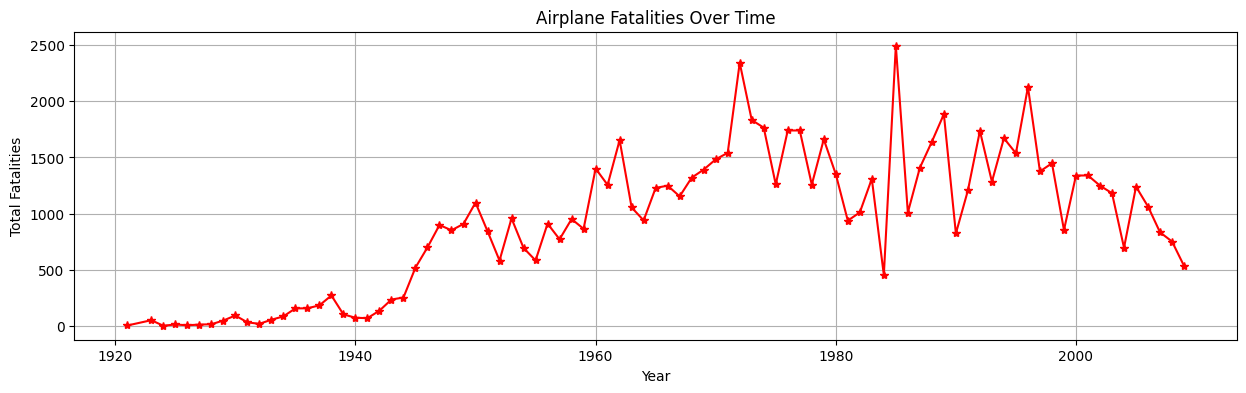

In [55]:
## Fatilities over time (Yearly)

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
fatalities_per_year = df.groupby(df["Date"].dt.year)["Fatalities"].sum()
plt.figure(figsize=(15, 4))
plt.plot(fatalities_per_year.index, fatalities_per_year.values, marker="*", linestyle="-", color="red")
plt.xlabel("Year")
plt.ylabel("Total Fatalities")
plt.title("Airplane Fatalities Over Time")
plt.grid(True)
plt.show()

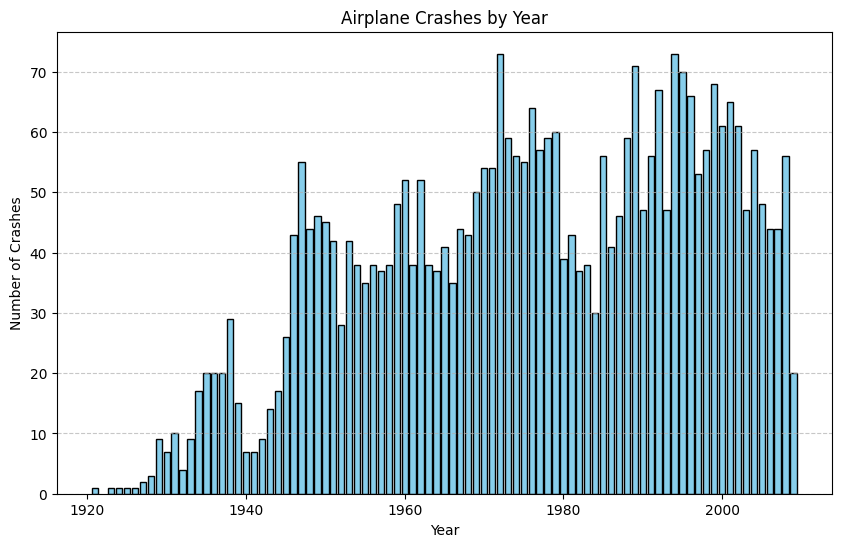

In [56]:
## Crashes by year

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
crashes_per_year = df["Date"].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(crashes_per_year.index, crashes_per_year.values, color="skyblue", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.title("Airplane Crashes by Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

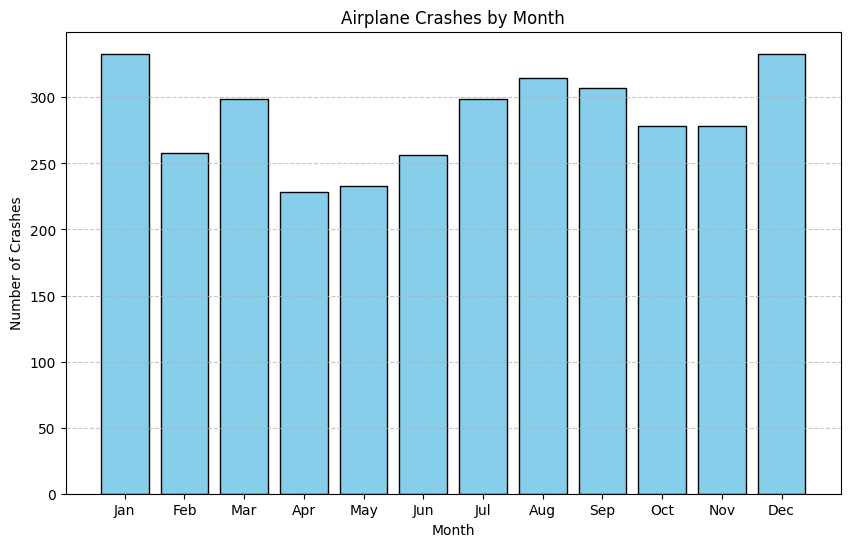

In [57]:
## Crashes by Month

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
crashes_per_month = df["Date"].dt.month.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(crashes_per_month.index, crashes_per_month.values, color="skyblue", edgecolor="black")
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.title("Airplane Crashes by Month")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [58]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Route', 'Type', 'Registration',
       'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

C:\Users\abdul\AppData\Local\Temp\ipykernel_18848\2046030742.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


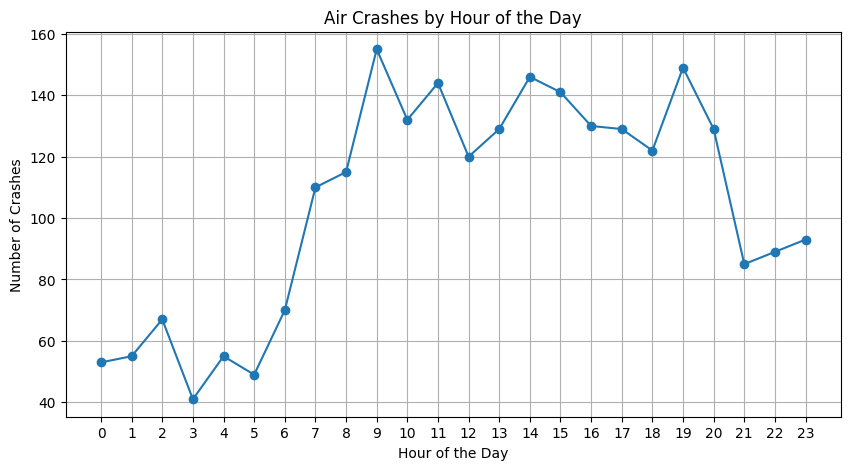

In [59]:
# Crashes by hour of the day
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

crash_counts = df['Time'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(crash_counts.index, crash_counts.values, marker='o', linestyle='-')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crashes")
plt.title("Air Crashes by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# Region wise #

Country column contains data other than names of the countries.
Names of states, and other entries like 'Over the Mediterranean Sea'

In [60]:
!pip install pycountry
!pip install us
!pip install geopy

import pycountry
from geopy.geocoders import Nominatim
import us


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\abdul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\abdul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\abdul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [61]:
geolocator = Nominatim(user_agent="airplane_crash_analysis")

countries = {country.name.lower(): country.name for country in pycountry.countries}
us_states = {state.name.lower(): "United States" for state in us.states.STATES}
us_state_abbreviations = {state.abbr.lower(): "United States" for state in us.states.STATES}

uk_subdivisions = {
    subdivision.name.lower(): "United Kingdom"
    for country in pycountry.countries
    if country.name == "United Kingdom"
    for subdivision in pycountry.subdivisions.get(country_code=country.alpha_2)
}

additional_countries = {
    "trinidad": "Trinidad and Tobago",
    "burma": "Myanmar",
    "persia": "Iran",
    "amsterdam": "Netherlands",
    "east timor": "Timor-Leste",
    "democratirepubliof congo": "Democratic Republic of Congo",
    "off turks and caicos islands": "Turks and Caicos Islands",
}

def clean_country(value):
    value = value.lower().strip()

    for prefix in ["near ", "off ", "close to "]:
        if value.startswith(prefix):
            value = value[len(prefix):].strip()

    if value in additional_countries:
        return additional_countries[value]

    if value in countries:
        return countries[value]

    if value in us_states or value in us_state_abbreviations:
        return "United States"

    if value in uk_subdivisions:
        return "United Kingdom"

    if any(word in value for word in ["sea", "ocean", "mediterranean", "pacific", "atlantic"]):
        return "Over the Ocean/Sea"

    return value.title()

df["Location"] = df["Location"].astype(str)
df["Country"] = df["Location"].apply(lambda x: x.split(",")[-1].strip())
df["Country"] = df["Country"].apply(clean_country)

country_counts = df["Country"].value_counts()
print(country_counts)


Country
United States                   1015
Brazil                           111
Colombia                         108
Canada                           101
Russia                           100
                                ... 
Western Samoa                      1
Us Virgin Islands                  1
Alakska                            1
South Yemen                        1
Democratic Republic of Congo       1
Name: count, Length: 305, dtype: int64


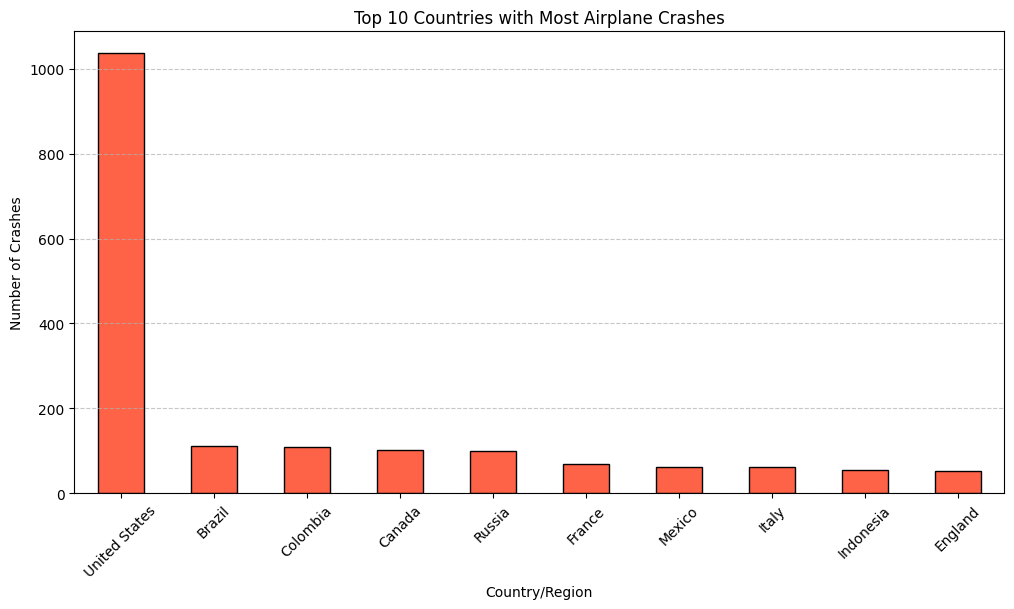

In [62]:
us_states = {state.name.lower(): "United States" for state in us.states.STATES}
us_state_abbreviations = {state.abbr.lower(): "United States" for state in us.states.STATES}

def clean_country(value):
    value = value.lower().strip()

    if value in us_states or value in us_state_abbreviations:
        return "United States"

    return value.title()

df["Location"] = df["Location"].astype(str)
df["Country"] = df["Location"].apply(lambda x: x.split(",")[-1].strip())
df["Country"] = df["Country"].apply(clean_country)

crashes_per_country = df["Country"].value_counts()

plt.figure(figsize=(12, 6))
crashes_per_country.head(10).plot(kind="bar", color="tomato", edgecolor="black")

plt.xlabel("Country/Region")
plt.ylabel("Number of Crashes")
plt.title("Top 10 Countries with Most Airplane Crashes")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


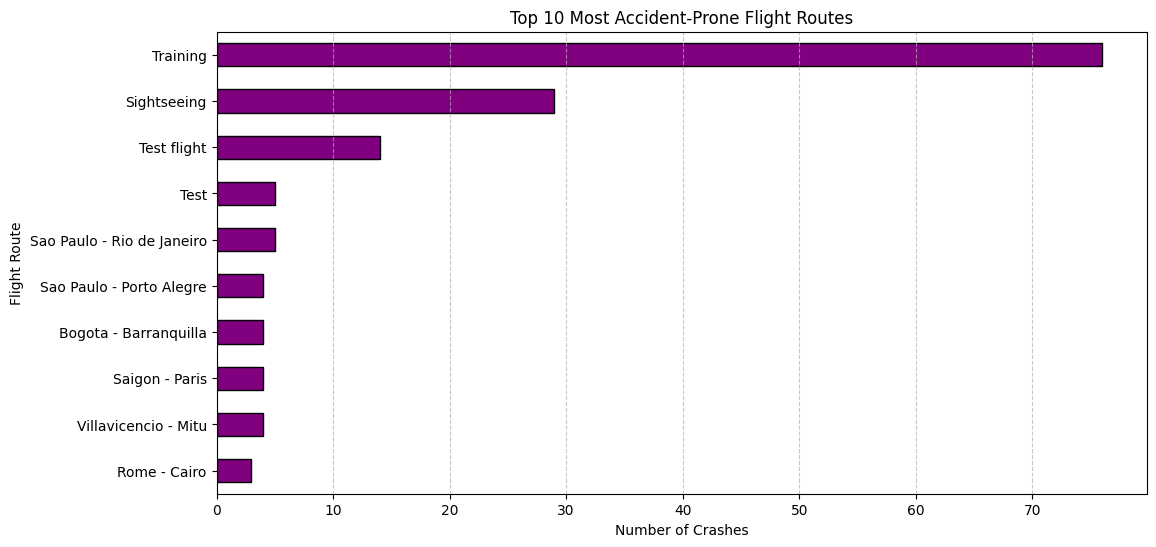

In [63]:
df["Route"] = df["Route"].astype(str)
route_counts = df["Route"].value_counts()
top_routes = route_counts.head(10)

plt.figure(figsize=(12, 6))
top_routes.plot(kind="barh", color="purple", edgecolor="black")
plt.xlabel("Number of Crashes")
plt.ylabel("Flight Route")
plt.title("Top 10 Most Accident-Prone Flight Routes")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Test vs Test flight seems like same category so merging them both into single 'Test FLight' #

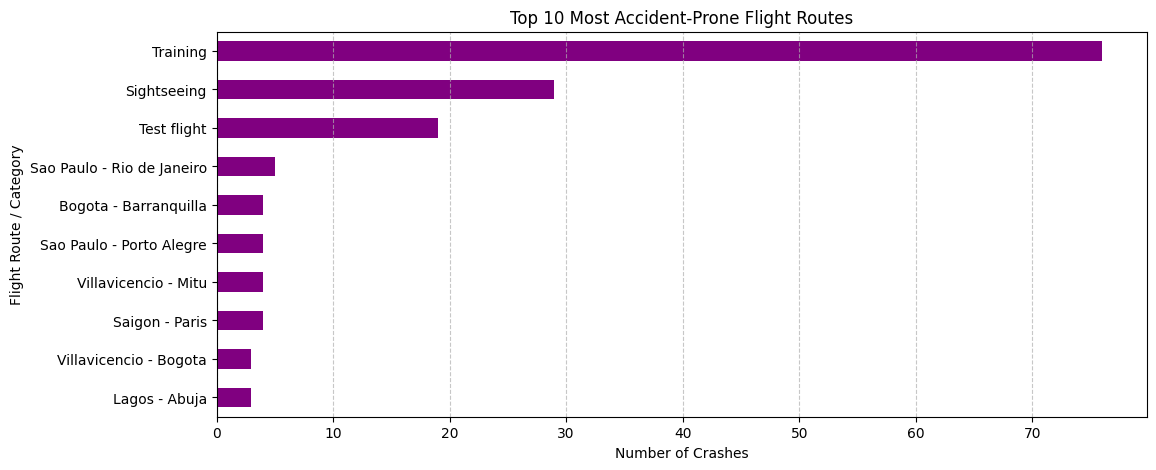

In [64]:
df['Route'] = df['Route'].replace({'Test': 'Test flight'})
crash_counts = df['Route'].value_counts().nlargest(10)

plt.figure(figsize=(12, 5))
crash_counts.sort_values().plot(kind='barh', color='purple')
plt.xlabel("Number of Crashes")
plt.ylabel("Flight Route / Category")
plt.title("Top 10 Most Accident-Prone Flight Routes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## What's the purpose of these in the flight route columns?:
1. Training
2. Sightseeing
3. Test Flight
##

are the purpose and route columns mixed?
shall we remove the above 3 category from the route columns?

This shows that the route column shows routes for some while purpose for other flights.

Dataset likely doesn't strictly separate commercial routes from non-commercial flights.  May need to filter out the rows which contains purppose of the flight instead of the route, if we want to analyse the relation between the routes and the crashes.

Better approach, divide the dataset into 2,
1. which has all valid routes
2. which contains purposes (training, test flight, sightseeing) instead of routes and renaming the route column in this to purpose

In [65]:
purpose_categories = ['Training', 'Test Flight', 'Sightseeing', 'Test flight']

df_routes = df[~df['Route'].isin(purpose_categories)].copy()
df_purpose = df[df['Route'].isin(purpose_categories)].copy()
df_purpose.rename(columns={'Route': 'Purpose'}, inplace=True)


In [66]:
print("Flight Routes Dataset:")
df_routes.head(2)

Flight Routes Dataset:


,Date,Time,Location,Operator,Route,Type,Registration,Aboard,Fatalities,Ground,Summary,Country
56,1921-09-06,NaN,"Paris, France",Franco-Roumaine,Varsovie - Strasbourg - Paris,Potez IX,F-ADCD,5.0,5.0,0.0,Crashed while making an approach to Le Bourget...,France
80,1923-12-23,2.0,Over the Mediterranean Sea,Military - French Navy,Toulon - Algiers,Zeppelin Dixmunde (airship),L-72,52.0,52.0,0.0,"Crashed while on a flight from Toulon, France ...",Over The Mediterranean Sea


In [67]:
print("\nFlight Purposes Dataset:")
df_purpose.head(2)


Flight Purposes Dataset:


,Date,Time,Location,Operator,Purpose,Type,Registration,Aboard,Fatalities,Ground,Summary,Country
121,1927-09-17,NaN,"Hadley, New Jersey",Reynolds Airways,Sightseeing,Fokker F-VII,NC776,12.0,7.0,0.0,The sightseeing plane took off and rose to 400...,United States
174,1929-03-17,NaN,"Newark, New Jersey",Colonial Western Airlines,Sightseeing,Ford 5-AT-B Tri Motor,NC7683,15.0,14.0,0.0,The plane was making the last of a number of s...,United States


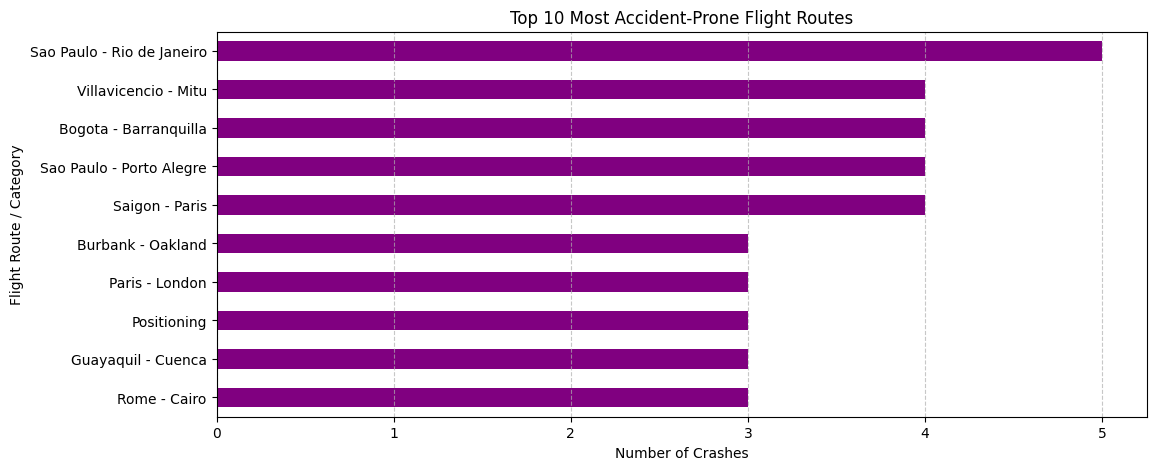

In [68]:
# Most accident prone flight routes after separating routes form the purposes

crash_counts = df_routes['Route'].value_counts().nlargest(10)
plt.figure(figsize=(12, 5))
crash_counts.sort_values().plot(kind='barh', color='purple')
plt.xlabel("Number of Crashes")
plt.ylabel("Flight Route / Category")
plt.title("Top 10 Most Accident-Prone Flight Routes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


C:\Users\abdul\AppData\Local\Temp\ipykernel_18848\1382515030.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette="viridis")


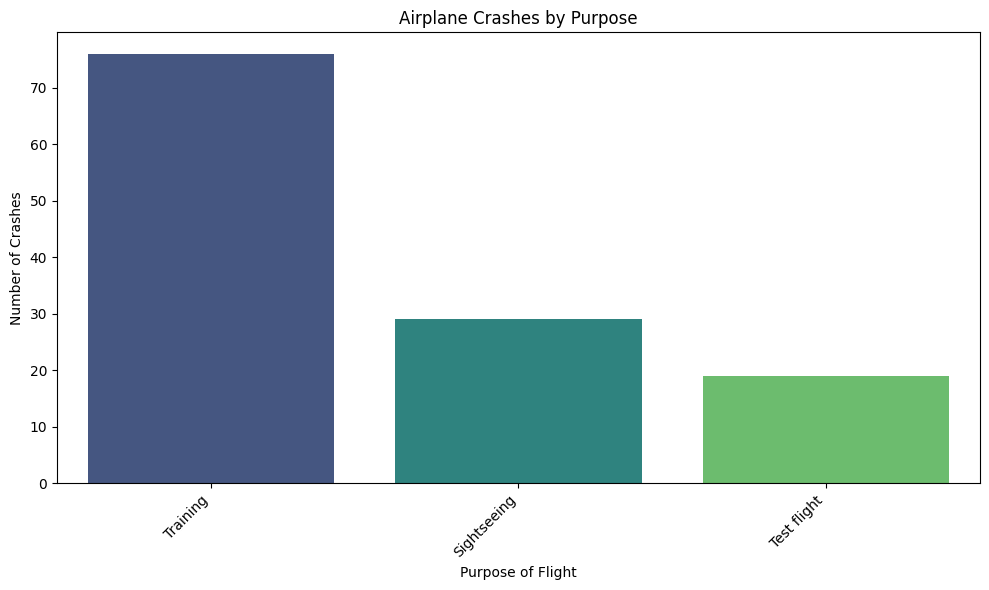

In [69]:
# Crashes by train,test,sightseeing
purpose_counts = df_purpose['Purpose'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette="viridis")

plt.title('Airplane Crashes by Purpose')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [70]:
df['Summary'].nunique()
df['Summary'].describe()
df['Summary'].apply(len).describe()


count    3417.000000
mean      235.635645
std       210.765215
min        12.000000
25%        96.000000
50%       169.000000
75%       312.000000
max      1954.000000
Name: Summary, dtype: float64

In [71]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

df['cleaned_summary'] = df['Summary'].apply(lambda x: clean_text(str(x)))


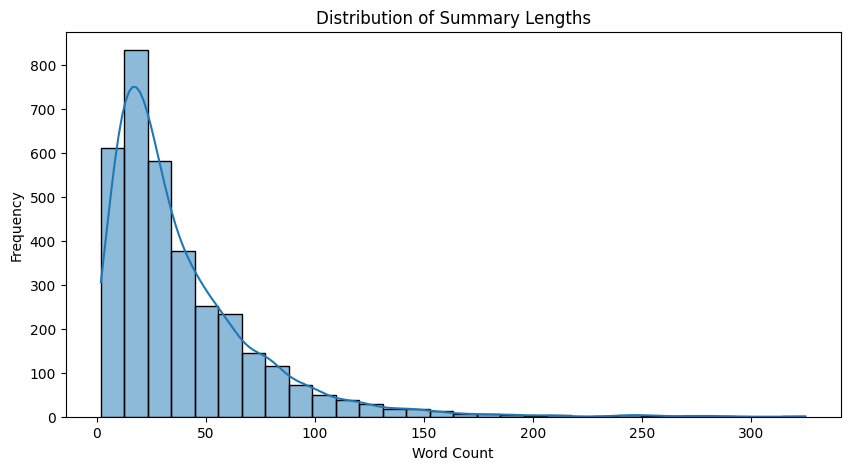

In [72]:
df['summary_length'] = df['Summary'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,5))
sns.histplot(df['summary_length'], bins=30, kde=True)
plt.title("Distribution of Summary Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [73]:
word_freq = Counter(" ".join(df['cleaned_summary']).split())
common_words = word_freq.most_common(20)
common_words


[('crashed', 2299),
 ('aircraft', 2069),
 ('plane', 1494),
 ('pilot', 1093),
 ('flight', 915),
 ('engine', 843),
 ('approach', 820),
 ('runway', 775),
 ('crew', 758),
 ('failure', 729),
 ('landing', 582),
 ('airport', 555),
 ('mountain', 498),
 ('condition', 496),
 ('weather', 493),
 ('altitude', 489),
 ('control', 465),
 ('takeoff', 414),
 ('mile', 410),
 ('land', 402)]

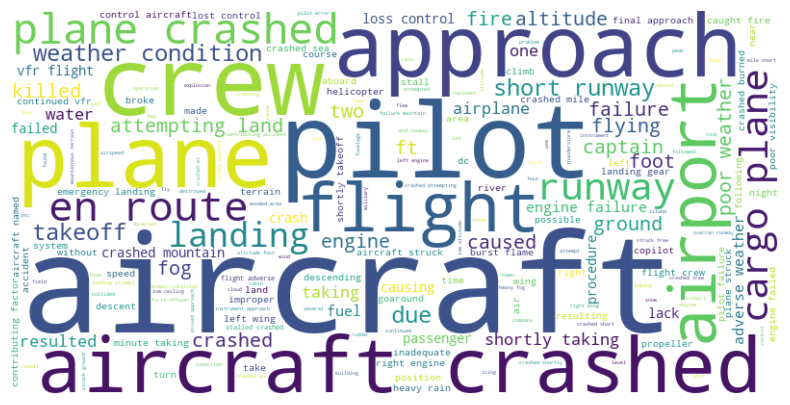

In [74]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['cleaned_summary']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [75]:
bigrams = list(ngrams(" ".join(df['cleaned_summary']).split(), 2))
trigrams = list(ngrams(" ".join(df['cleaned_summary']).split(), 3))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

bigram_counts.most_common(10), trigram_counts.most_common(10)


([(('aircraft', 'crashed'), 383),
  (('plane', 'crashed'), 340),
  (('en', 'route'), 320),
  (('cargo', 'plane'), 268),
  (('weather', 'condition'), 224),
  (('short', 'runway'), 210),
  (('attempting', 'land'), 199),
  (('poor', 'weather'), 143),
  (('shortly', 'taking'), 140),
  (('engine', 'failure'), 124)],
 [(('adverse', 'weather', 'condition'), 89),
  (('continued', 'vfr', 'flight'), 68),
  (('cargo', 'plane', 'crashed'), 66),
  (('flight', 'adverse', 'weather'), 62),
  (('crashed', 'en', 'route'), 59),
  (('poor', 'weather', 'condition'), 57),
  (('vfr', 'flight', 'adverse'), 53),
  (('crashed', 'short', 'runway'), 50),
  (('mile', 'short', 'runway'), 47),
  (('crashed', 'shortly', 'taking'), 38)])

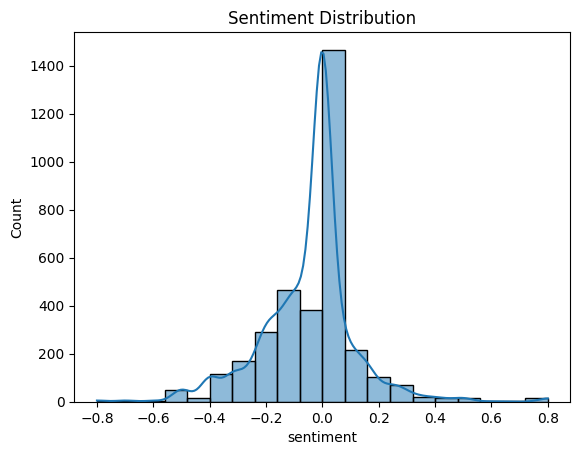

In [76]:
df['sentiment'] = df['Summary'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title("Sentiment Distribution")
plt.show()


In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_summary'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

for index, topic in enumerate(lda.components_):
    print(f"Topic {index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 0:
['left', 'flight', 'loss', 'fuel', 'control', 'failure', 'plane', 'crashed', 'aircraft', 'engine']
Topic 1:
['ground', 'flame', 'killed', 'crew', 'takeoff', 'crashed', 'landing', 'plane', 'aircraft', 'runway']
Topic 2:
['mountain', 'land', 'struck', 'altitude', 'short', 'crew', 'runway', 'aircraft', 'crashed', 'approach']
Topic 3:
['pilot', 'taking', 'airport', 'mile', 'mountain', 'aircraft', 'en', 'route', 'plane', 'crashed']
Topic 4:
['accident', 'vfr', 'failure', 'terrain', 'aircraft', 'crashed', 'weather', 'flight', 'condition', 'pilot']


In [78]:
df.to_csv('airplane_crashes_cleaned.csv', index=False)

df_routes.to_csv('airplane_crashes_routes.csv', index=False)

df_purpose.to_csv('airplane_crashes_purposes.csv', index=False)

## Model

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

--------------------------------------------------
# Loading and preprocessing the dataset
--------------------------------------------------

In [90]:
df = pd.read_csv('airplane_crashes_cleaned.csv')
df_routes = pd.read_csv('airplane_crashes_routes.csv')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df_routes['Date'] = pd.to_datetime(df_routes['Date'], errors='coerce')

df_routes['Year'] = df_routes['Date'].dt.year
df_routes['Decade'] = (df_routes['Year'] // 10) * 10

--------------------------------------------
# PART 1: Flight Route Risk Model
--------------------------------------------

In [91]:
def extract_route_pattern(route_str):
    """Extract a standardized route pattern from route string"""
    if pd.isna(route_str) or route_str == 'nan':
        return 'Unknown'
    
    route_str = str(route_str).strip()
    
    if ' - ' in route_str:
        parts = route_str.split(' - ')
        if len(parts) >= 2:
            origin = parts[0].strip()
            destination = parts[-1].strip()
            return f"{origin} to {destination}"
    
    return route_str

df_routes['RoutePattern'] = df_routes['Route'].apply(extract_route_pattern)

route_stats = df_routes.groupby('RoutePattern').agg({
    'Operator': 'count',
    'Aboard': 'sum',    
    'Fatalities': 'sum',
    'Year': ['min', 'max', 'mean']
}).reset_index()

route_stats.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in route_stats.columns]

route_stats['SurvivalRate'] = 1 - (route_stats['Fatalities_sum'] / route_stats['Aboard_sum'])
route_stats['SurvivalRate'] = route_stats['SurvivalRate'].fillna(0)

route_stats['YearsActive'] = route_stats['Year_max'] - route_stats['Year_min'] + 1
route_stats['YearsActive'] = route_stats['YearsActive'].replace(0, 1)
route_stats['CrashFrequency'] = route_stats['Operator_count'] / route_stats['YearsActive']
route_stats['FatalityRate'] = route_stats['Fatalities_sum'] / route_stats['Operator_count']

significant_routes = route_stats[route_stats['Operator_count'] >= 2].copy()

scaler = MinMaxScaler()
features = ['FatalityRate', 'CrashFrequency', 'SurvivalRate', 'Year_mean']
significant_routes[features] = scaler.fit_transform(significant_routes[features])

significant_routes['RiskScore'] = (
    0.4 * significant_routes['FatalityRate'] + 
    0.3 * significant_routes['CrashFrequency'] + 
    0.2 * (1 - significant_routes['SurvivalRate']) +
    0.1 * significant_routes['Year_mean']
)

min_risk = significant_routes['RiskScore'].min()
max_risk = significant_routes['RiskScore'].max()
significant_routes['RiskScore'] = (significant_routes['RiskScore'] - min_risk) / (max_risk - min_risk)

X_risk = significant_routes[['Operator_count', 'Aboard_sum', 'Fatalities_sum', 
                      'Year_mean', 'SurvivalRate', 'CrashFrequency', 'FatalityRate']]
y_risk = significant_routes['RiskScore']


risk_model = LinearRegression()
risk_model.fit(X_risk, y_risk)

X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(
    X_risk, y_risk, test_size=0.3, random_state=42
)
risk_model.fit(X_train_risk, y_train_risk)
y_pred_risk = risk_model.predict(X_test_risk)

# print(f"Risk Model R² Score: {r2_score(y_test_risk, y_pred_risk):.4f}")
# print(f"Risk Model MSE: {mean_squared_error(y_test_risk, y_pred_risk):.4f}")

Risk Model R² Score: 1.0000
Risk Model MSE: 0.0000
Risk Model MAE: 0.0000


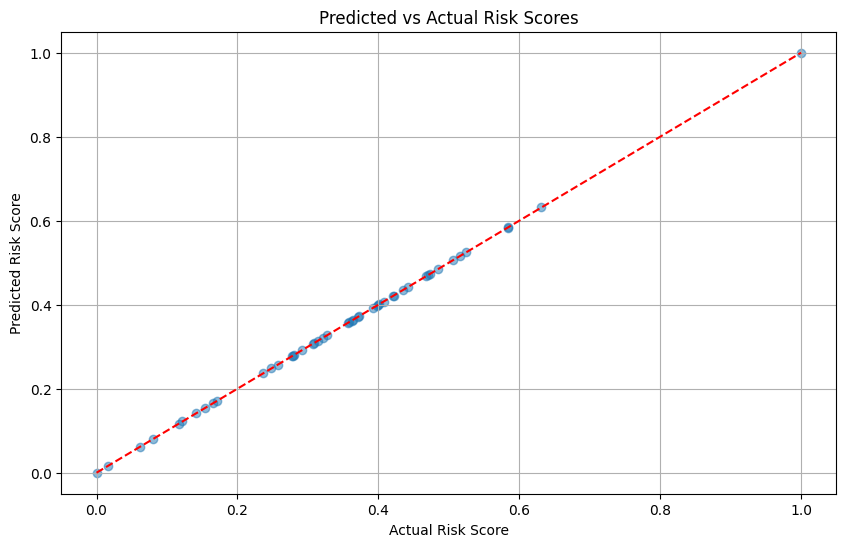

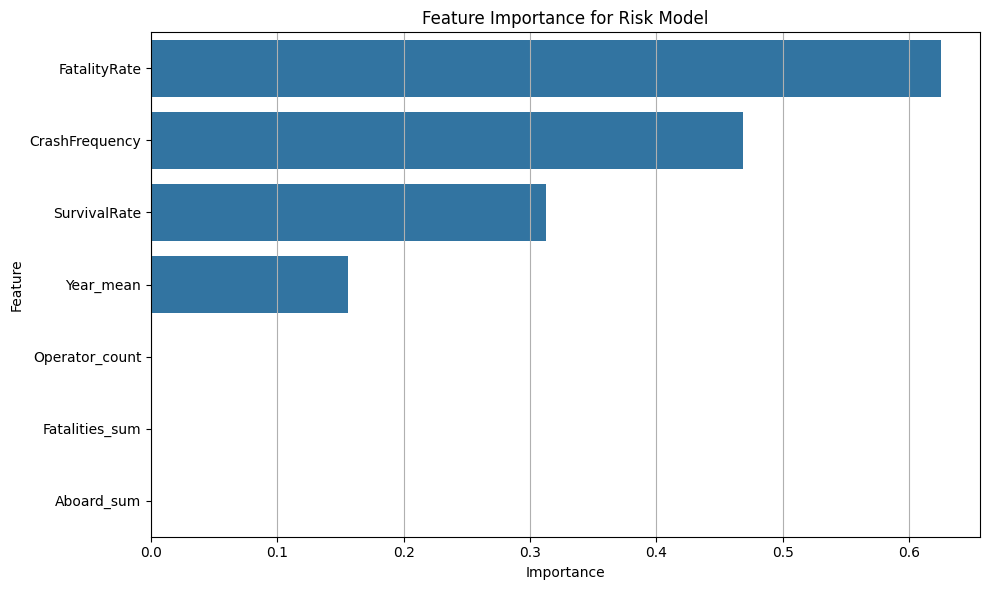

In [ ]:
r2 = r2_score(y_test_risk, y_pred_risk)
mse = mean_squared_error(y_test_risk, y_pred_risk)
mae = mean_absolute_error(y_test_risk, y_pred_risk)

print(f"Risk Model R² Score: {r2:.4f}")
print(f"Risk Model MSE: {mse:.4f}")
print(f"Risk Model MAE: {mae:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_risk, y_pred_risk, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Actual Risk Score')
plt.ylabel('Predicted Risk Score')
plt.title('Predicted vs Actual Risk Scores')
plt.grid(True)
plt.show()

feature_importance = pd.DataFrame({
    'Feature': X_risk.columns,
    'Importance': np.abs(risk_model.coef_)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Risk Model')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

------------------------------
# PART 2: Crash Cause Classification Model
----------------------------------

In [92]:
def clean_text(text):
    """Clean and preprocess text data"""
    if pd.isna(text) or text == 'No summary provided':
        return ""
    
    text = text.lower()
    
    text = re.sub(r'[^a-z\s]', ' ', text)
    
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

df['cleaned_summary'] = df['Summary'].apply(lambda x: clean_text(str(x)))

df = df[df['cleaned_summary'].str.strip() != ""]

cause_categories = {
    'Weather': ['weather', 'fog', 'rain', 'storm', 'wind', 'snow', 'lightning', 'thunderstorm', 
                'turbulence', 'icing', 'ice', 'visibility', 'cloud', 'hurricane', 'tornado'],
    
    'Mechanical': ['engine', 'mechanical', 'failure', 'malfunction', 'gear', 'hydraulic', 
                  'system', 'brake', 'structural', 'electrical', 'tire', 'fuel', 'propeller', 
                  'landing gear', 'maintenance'],
    
    'Pilot Error': ['pilot', 'error', 'misjudgment', 'inexperience', 'fatigue', 'control', 
                   'deviation', 'descend', 'navigational', 'judgment', 'altitude', 'approach', 
                   'procedure', 'instruction'],
    
    'Fire': ['fire', 'smoke', 'explosion', 'burn', 'flames', 'heat', 'combustion'],
    
    'Collision': ['collision', 'hit', 'struck', 'collided', 'crashed into', 'midair', 
                 'obstacle', 'mountain', 'terrain', 'building', 'bird', 'bird strike'],
    
    'Sabotage': ['bomb', 'sabotage', 'hijack', 'terrorist', 'explosion', 'attack', 'shot down',
                'missile', 'military'],
    
    'Other': ['unknown', 'mysterious', 'undetermined']
}

def tag_causes(summary, categories):
    """Tag a summary with cause categories based on keywords"""
    summary = summary.lower()
    tags = []
    
    for category, keywords in categories.items():
        if any(keyword in summary for keyword in keywords):
            tags.append(category)
    
    if not tags:
        tags.append('Other')
    
    return tags

df['cause_tags'] = df['cleaned_summary'].apply(lambda x: tag_causes(x, cause_categories))

mlb = MultiLabelBinarizer()
y_cause = mlb.fit_transform(df['cause_tags'])

X_train_cause, X_test_cause, y_train_cause, y_test_cause = train_test_split(
    df['cleaned_summary'], y_cause, test_size=0.3, random_state=42
)

cause_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear', max_iter=1000)))
])

cause_pipeline.fit(X_train_cause, y_train_cause)

y_pred_cause = cause_pipeline.predict(X_test_cause)
print(f"Cause Classification Accuracy: {accuracy_score(y_test_cause, y_pred_cause):.4f}")

# Calculate metrics for each cause category
# for i, cause in enumerate(mlb.classes_):
#     try:
#         precision = classification_report(y_test_cause[:, i], y_pred_cause[:, i], output_dict=True)['1']['precision']
#         recall = classification_report(y_test_cause[:, i], y_pred_cause[:, i], output_dict=True)['1']['recall']
#         f1 = classification_report(y_test_cause[:, i], y_pred_cause[:, i], output_dict=True)['1']['f1-score']
#         # print(f"{cause}: Precision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}")
#     except Exception as e:
#         break

Cause Classification Accuracy: 0.5265


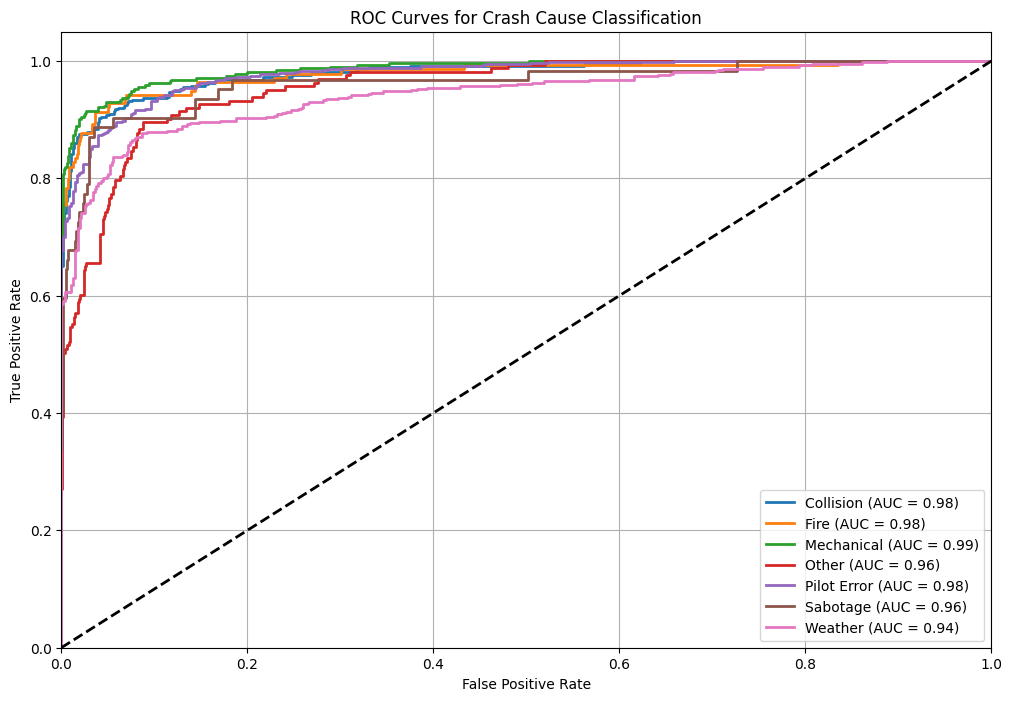

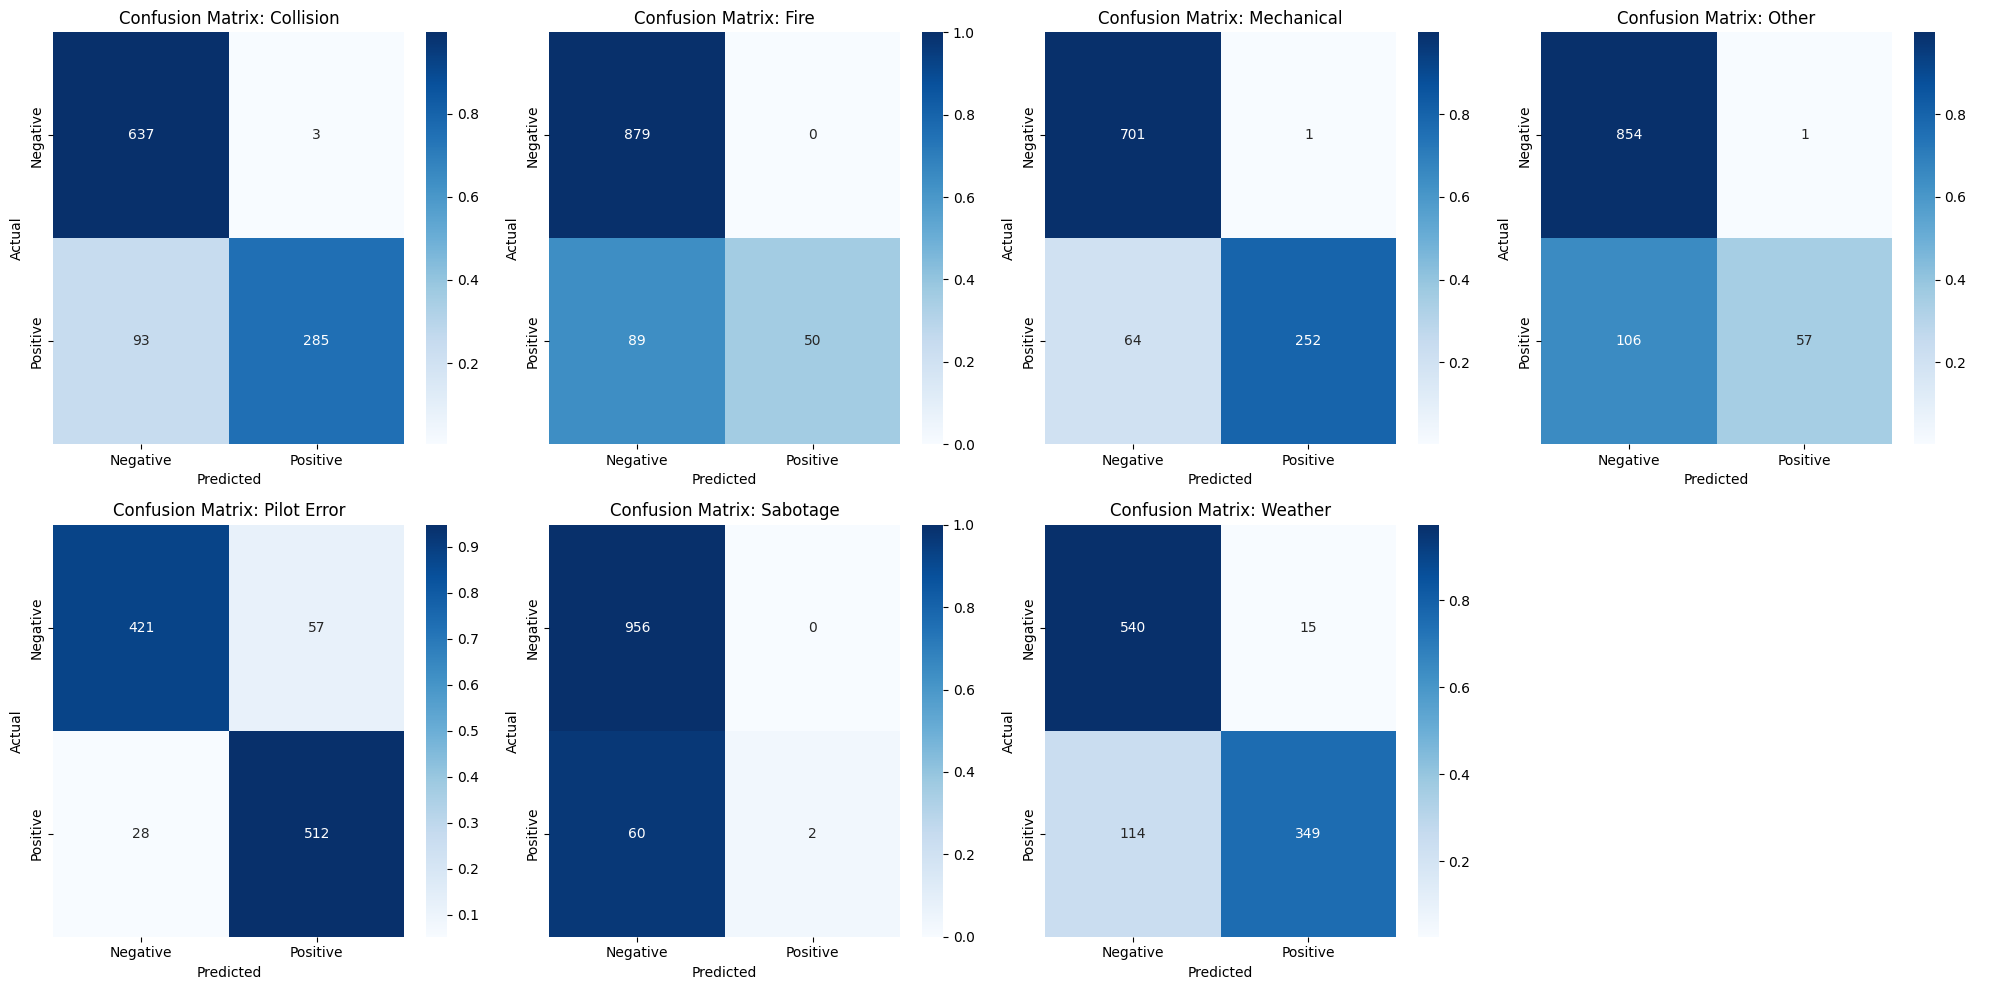

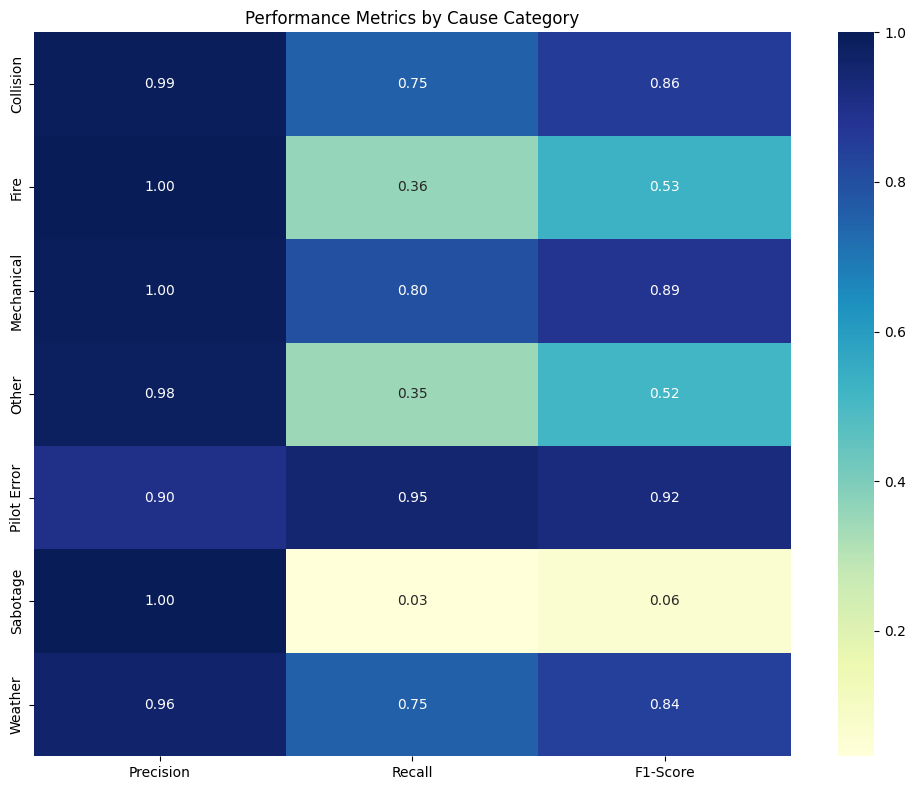

In [ ]:
plt.figure(figsize=(12, 8))
for i, cause in enumerate(mlb.classes_):
    if len(np.unique(y_test_cause[:, i])) > 1:
        fpr, tpr, _ = roc_curve(y_test_cause[:, i], cause_pipeline.predict_proba(X_test_cause)[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{cause} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Crash Cause Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, cause in enumerate(mlb.classes_):
    if i < len(axes):
        cm = confusion_matrix(y_test_cause[:, i], y_pred_cause[:, i])
        
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_norm = np.nan_to_num(cm_norm)
        
        sns.heatmap(cm_norm, annot=cm, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix: {cause}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
        axes[i].set_xticklabels(['Negative', 'Positive'])
        axes[i].set_yticklabels(['Negative', 'Positive'])


for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


metrics_df = pd.DataFrame(columns=['Precision', 'Recall', 'F1-Score', 'Support'])

for i, cause in enumerate(mlb.classes_):
    try:
        report = classification_report(y_test_cause[:, i], y_pred_cause[:, i], output_dict=True)
        metrics_df.loc[cause] = [
            report['1']['precision'], 
            report['1']['recall'], 
            report['1']['f1-score'], 
            report['1']['support']
        ]
    except Exception as e:
        metrics_df.loc[cause] = [0, 0, 0, 0]

plt.figure(figsize=(10, 8))
sns.heatmap(metrics_df[['Precision', 'Recall', 'F1-Score']], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Performance Metrics by Cause Category')
plt.tight_layout()
plt.show()




---------------------------------
# PART 3: Combined Risk & Cause Prediction System
--------------------------------

In [85]:
class FlightRiskAnalyzer:
    """
    A combined system that predicts both flight risk scores and potential crash causes
    """
    def __init__(self, risk_model, cause_pipeline, mlb, route_stats, min_risk, max_risk):
        self.risk_model = risk_model
        self.cause_pipeline = cause_pipeline
        self.mlb = mlb
        self.route_stats = route_stats
        self.min_risk = min_risk
        self.max_risk = max_risk
        
    def get_route_risk(self, route_pattern):
        """Get risk score for a known route pattern"""
        if route_pattern in self.route_stats['RoutePattern'].values:
            route_data = self.route_stats[self.route_stats['RoutePattern'] == route_pattern]
            return float(route_data['RiskScore'].values[0])
        else:
            return None
    
    def calculate_risk_score(self, crashes, aboard, fatalities, avg_year, active_years):
        """Calculate risk score for a new or unknown route"""
        survival_rate = 1 - (fatalities / aboard) if aboard > 0 else 0
        crash_frequency = crashes / active_years if active_years > 0 else crashes
        fatality_rate = fatalities / crashes if crashes > 0 else 0
        
        X_new = np.array([[
            crashes, aboard, fatalities, 
            avg_year, survival_rate, crash_frequency, fatality_rate
        ]])
        
        risk_score = self.risk_model.predict(X_new)[0]
        
        risk_score = (risk_score - self.min_risk) / (self.max_risk - self.min_risk)
        
        risk_score = max(0, min(1, risk_score))
        
        return risk_score
    
    def predict_crash_causes(self, summary_text):
        """Predict potential causes if a crash were to occur"""
        
        cleaned_text = clean_text(summary_text)
        
        if not cleaned_text.strip():
            return [("Insufficient data", 0.0)]
        
        proba = self.cause_pipeline.predict_proba([cleaned_text])[0]
        
        causes_proba = [(cause, prob) for cause, prob in zip(self.mlb.classes_, proba)]
        
        causes_proba.sort(key=lambda x: x[1], reverse=True)
        
        return causes_proba
    
    def interpret_risk_score(self, risk_score):
        """Interpret the risk score with descriptive categories"""
        if risk_score < 0.2:
            return "Very Low Risk"
        elif risk_score < 0.4:
            return "Low Risk"
        elif risk_score < 0.6:
            return "Moderate Risk"
        elif risk_score < 0.8:
            return "High Risk"
        else:
            return "Very High Risk"
    
    def analyze_route(self, route=None, summary=None, crashes=None, aboard=None, 
                     fatalities=None, avg_year=None, active_years=None):
        """
        Comprehensive analysis of a flight route
        
        Parameters:
        - route: Route pattern to look up (if known in the database)
        - summary: Route description or crash summary for cause prediction
        - crashes: Number of past crashes on this route
        - aboard: Total number of people aboard in past crashes
        - fatalities: Total number of fatalities in past crashes
        - avg_year: Average year of crashes
        - active_years: Number of years the route has been active
        
        Returns:
        - Dictionary with risk score and potential crash causes
        """
        result = {
            "route": route,
            "risk_score": None,
            "risk_category": None,
            "potential_causes": []
        }
        
        if route is not None:
            risk_score = self.get_route_risk(route)
            if risk_score is not None:
                result["risk_score"] = risk_score
                result["risk_category"] = self.interpret_risk_score(risk_score)
                result["risk_source"] = "historical data"
        
        if result["risk_score"] is None and all(x is not None for x in [crashes, aboard, fatalities, avg_year, active_years]):
            risk_score = self.calculate_risk_score(crashes, aboard, fatalities, avg_year, active_years)
            result["risk_score"] = risk_score
            result["risk_category"] = self.interpret_risk_score(risk_score)
            result["risk_source"] = "calculated"
        
        if summary is not None:
            causes = self.predict_crash_causes(summary)
            result["potential_causes"] = causes
        
        return result


analyzer = FlightRiskAnalyzer(
    risk_model=risk_model,
    cause_pipeline=cause_pipeline,
    mlb=mlb,
    route_stats=significant_routes,
    min_risk=min_risk,
    max_risk=max_risk
)

# # Save the combined model
# with open('flight_risk_analyzer.pkl', 'wb') as f:
#     pickle.dump(analyzer, f)

# print("Combined model saved as 'flight_risk_analyzer.pkl'")


----------------------
# Command-line interface for the model
--------------------------

In [86]:
def main():
    """Command-line interface for the flight risk analyzer"""
    print("\n=== Flight Risk & Crash Cause Analyzer ===")
    
    while True:
        print("\nOptions:")
        print("1. Analyze existing route")
        print("2. Analyze new route")
        print("3. Show top 5 riskiest routes")
        print("4. Show top 5 safest routes")
        print("5. Exit")
        
        choice = input("\nEnter your choice (1-5): ")
        
        if choice == '1':
            route = input("Enter route pattern (e.g., 'London to Paris'): ")
            summary = input("Enter route description or potential crash scenario (optional): ")
            
            if not summary.strip():
                summary = None
                
            analysis = analyzer.analyze_route(route=route, summary=summary)
            
            if analysis['risk_score'] is None:
                print(f"Route '{route}' not found in historical data.")
                continue
            
            printLine = True
            if analysis['potential_causes']:
                printLine = False
                
                
            print("\n ==========================")    
            print("\nAnalysis Results:")
            print(f"Route: {route}")
            print(f"Summary Provided: {summary if summary else 'None'}")
            print(f"Risk Score: {analysis['risk_score']:.4f}")
            print(f"Risk Category: {analysis['risk_category']}")
            
            if (printLine == True):
                print("\n ==========================") 
            
            
            if analysis['potential_causes']:
                print("Potential Crash Causes:")
                for cause, prob in analysis['potential_causes'][:3]:
                    print(f"- {cause}: {prob:.4f}")
                print("\n ==========================")     
        
        elif choice == '2':
            try:
                crashes = int(input("Enter number of past crashes: "))
                aboard = int(input("Enter total people aboard in past crashes: "))
                fatalities = int(input("Enter total fatalities in past crashes: "))
                avg_year = int(input("Enter average year of crashes (e.g., 2010): "))
                active_years = int(input("Enter years the route has been active: "))
                summary = input("Enter route description or potential crash scenario (optional): ")
                
                if not summary.strip():
                    summary = None
                
                analysis = analyzer.analyze_route(
                    crashes=crashes,
                    aboard=aboard,
                    fatalities=fatalities,
                    avg_year=avg_year,
                    active_years=active_years,
                    summary=summary
                )
                
                print("\nAnalysis Results:")
                print(f"Risk Score: {analysis['risk_score']:.4f}")
                print(f"Risk Category: {analysis['risk_category']}")
                
                if analysis['potential_causes']:
                    print("Potential Crash Causes:")
                    for cause, prob in analysis['potential_causes'][:3]:
                        print(f"- {cause}: {prob:.4f}")
            
            except ValueError:
                print("Error: Please enter valid numbers.")
        
        elif choice == '3':
            top_risky = significant_routes.sort_values('RiskScore', ascending=False).head(5)
            
            print("\nTop 5 Riskiest Routes:")
            for i, (_, row) in enumerate(top_risky.iterrows(), 1):
                print(f"{i}. {row['RoutePattern']}")
                print(f"   Risk Score: {row['RiskScore']:.4f}")
                print(f"   Risk Category: {analyzer.interpret_risk_score(row['RiskScore'])}")
                print(f"   Crashes: {row['Operator_count']}, Fatalities: {row['Fatalities_sum']}")
                print()
        
        elif choice == '4':
            top_safe = significant_routes.sort_values('RiskScore').head(5)
            
            print("\nTop 5 Safest Routes (with historical crash data):")
            for i, (_, row) in enumerate(top_safe.iterrows(), 1):
                print(f"{i}. {row['RoutePattern']}")
                print(f"   Risk Score: {row['RiskScore']:.4f}")
                print(f"   Risk Category: {analyzer.interpret_risk_score(row['RiskScore'])}")
                print(f"   Crashes: {row['Operator_count']}, Fatalities: {row['Fatalities_sum']}")
                print()
        
        elif choice == '5':
            print("Exiting program. Goodbye!")
            break
        
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()


=== Flight Risk & Crash Cause Analyzer ===

Options:
1. Analyze existing route
2. Analyze new route
3. Show top 5 riskiest routes
4. Show top 5 safest routes
5. Exit
Route '3' not found in historical data.

Options:
1. Analyze existing route
2. Analyze new route
3. Show top 5 riskiest routes
4. Show top 5 safest routes
5. Exit

Top 5 Riskiest Routes:
1. Boston to Los Angeles
   Risk Score: 1.0000
   Risk Category: Very High Risk
   Crashes: 2, Fatalities: 157.0

2. Tokyo to Osaka
   Risk Score: 0.9161
   Risk Category: Very High Risk
   Crashes: 2, Fatalities: 557.0

3. Barrow to Wainwright
   Risk Score: 0.8297
   Risk Category: Very High Risk
   Crashes: 2, Fatalities: 13.0

4. Hong Kong to Da Nang
   Risk Score: 0.8181
   Risk Category: Very High Risk
   Crashes: 2, Fatalities: 96.0

5. Bogota to Bucaramanga
   Risk Score: 0.8005
   Risk Category: Very High Risk
   Crashes: 2, Fatalities: 47.0


Options:
1. Analyze existing route
2. Analyze new route
3. Show top 5 riskiest routes
4